In [1]:
from Model.DCVAE import DCVAE,DCVAE_Norm,DCVAE_NormV2
from Model.Utils import LoadMPS45,PlotHistory,PlotDataAE
from keras.utils import to_categorical
from keras.optimizers import RMSprop,Adam
import numpy as np
%matplotlib notebook

Using TensorFlow backend.


# Load DataSet

In [2]:
x_train1,x_test1=LoadMPS45(dirBase='DataSet/MPS-45.mat',AllTrain=True);
x_train=to_categorical(x_train1,2)
x_test=to_categorical(x_test1,2)

# Create Convolutional Variational Autoencoder

In [3]:
model = DCVAE(input_shape=(45, 45, 2),filters=[32,32,16],strides=[2,2,1],KernelDim=(3,3,3),hidden_dim=1024,
              latent_dim=100,opt=RMSprop(lr=0.001),dropout=0.1)

# Training Network

In [4]:
model.fit(x_train, num_epochs=1000,batch_size=32,val_split=0.2,verbose=0)

Setting up model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 45, 45, 2)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 23, 23, 32)   608         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 12, 12, 32)   9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 12, 12, 16)   4624        conv2d_2[0][0]                   
_________________________________________________________________________________________


Epoch 00050: ReduceLROnPlateau reducing learning rate to 0.0003200000210199505.



Epoch 00058: ReduceLROnPlateau reducing learning rate to 0.00016000001050997525.



Epoch 00072: ReduceLROnPlateau reducing learning rate to 6.400000711437315e-05.



Epoch 00078: ReduceLROnPlateau reducing learning rate to 3.2000003557186574e-05.



Epoch 00083: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-05.



# Ploting Train History

val_loss   :  [240.69100838216147, 240.92822009277344, 240.78565592447916, 240.71963671875]
loss   :  [227.03067125715543, 226.9018155868269, 226.7279919859876, 226.59935529203113]


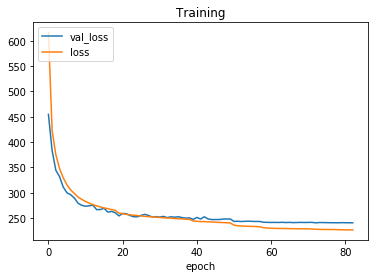

In [5]:
PlotHistory(model.history.history,listKeys=['val_loss','loss']) 

val_acc_pred   :  [0.9626544036865234, 0.9624779405593872, 0.962633416334788, 0.9625252688725789]
acc_pred   :  [0.9651353545535052, 0.965180339147862, 0.9651977895259678, 0.9652237796076051]


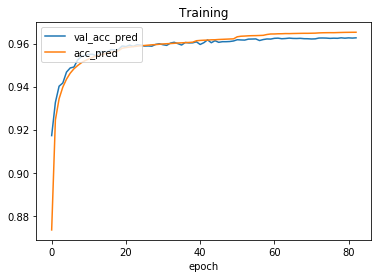

In [6]:
PlotHistory(model.history.history,listKeys=['val_acc_pred','acc_pred'])

lr   :  [3.2000004e-05, 2.5600002e-05, 2.5600002e-05, 2.5600002e-05]


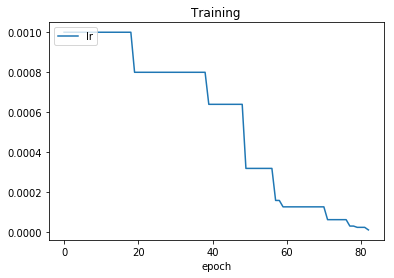

In [7]:
PlotHistory(model.history.history,listKeys=['lr'])

# Evaluate Model with Test dataset 

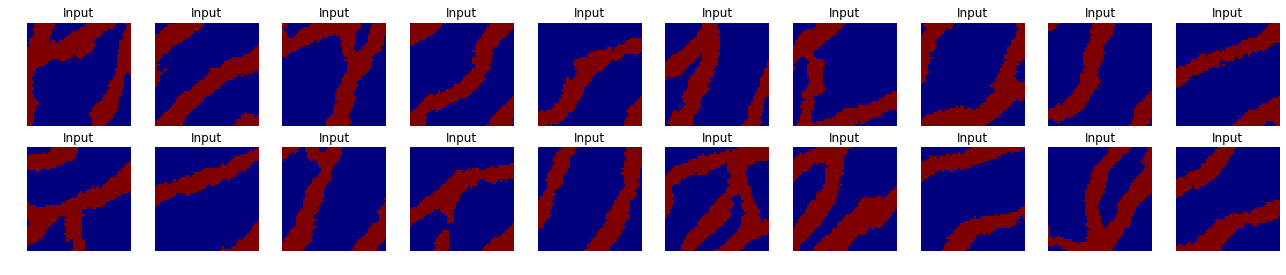

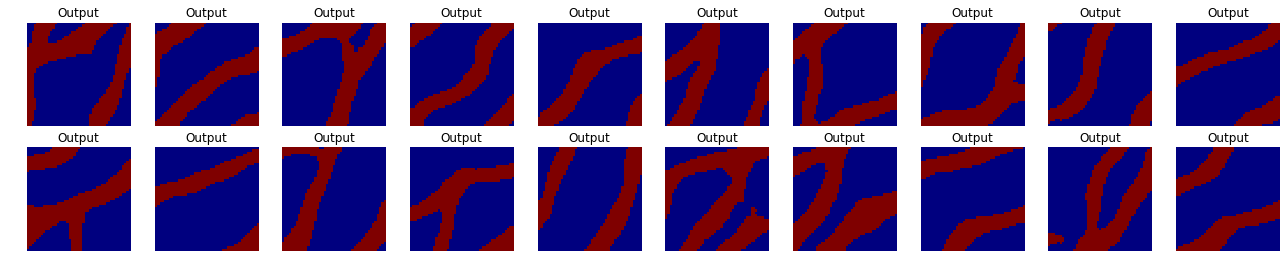

In [8]:
x_rec=model.model.predict(x_test)
PlotDataAE(x_test[:,:,:,1],np.argmax(x_rec[:,:,:,:],axis=-1),digit_size=45)

# Generate random sampling

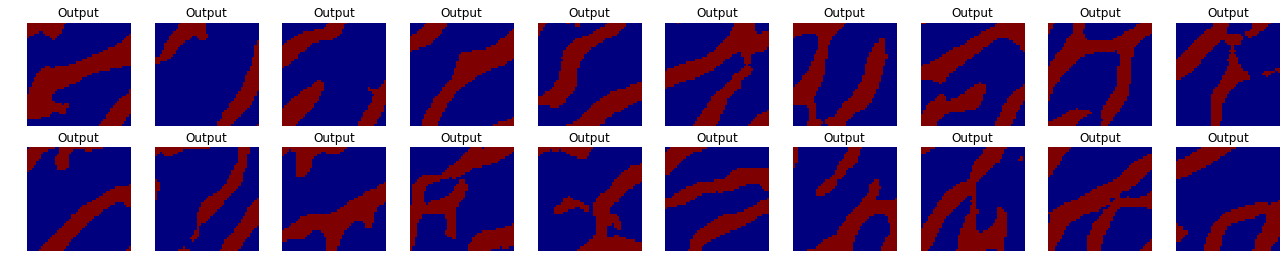

In [9]:
x_gen=model.generate(binary=True)
PlotDataAE([],x_gen[:,:,:],digit_size=45,Only_Result=False)